In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
car_detail= pd.read_csv('CAR DETAILS (1).csv')
car_detail.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_detail.shape

(4340, 8)

In [5]:
car_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
car_detail.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
car_detail.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
car_detail.duplicated().sum()

763

In [9]:
car_detail.drop_duplicates(inplace=True)

In [10]:
car_detail[car_detail.duplicated()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [11]:
car_detail.shape

(3577, 8)

In [12]:
car_detail.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [13]:
car_detail=car_detail.rename(columns={'name':'Name', 'year':'Year', 'selling_price':'Selling_Price', 'km_driven':'Km_Driven', 'fuel':'Fuel', 'seller_type':'Seller_Type',
       'transmission':'Transmission', 'owner':'Owner'})

In [14]:
car_detail['Brand'] = car_detail['Name'].apply(lambda x: x.split(' ')[0])
car_detail['Model'] = car_detail['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))
car_detail.drop('Name', axis=1, inplace=True)

In [15]:
car_detail[['Brand','Model']]


,Brand,Model
0,Maruti,800 AC
1,Maruti,Wagon R LXI Minor
2,Hyundai,Verna 1.6 SX
3,Datsun,RediGO T Option
4,Honda,Amaze VX i-DTEC
...,...,...
4335,Hyundai,i20 Magna 1.4 CRDi (Diesel)
4336,Hyundai,i20 Magna 1.4 CRDi
4337,Maruti,800 AC BSIII
4338,Hyundai,Creta 1.6 CRDi SX Option


In [16]:
car_detail.head()

,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [17]:
car_detail['Brand'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [18]:
car_detail['Model'].value_counts()

Swift Dzire VDI             54
Alto 800 LXI                48
Alto LXi                    42
Alto LX                     30
Swift VDI BSIV              28
                            ..
Innova 2.5 E 8 STR           1
Micra XL CVT                 1
Scorpio VLX AT 2WD BSIII     1
Corolla AE                   1
i20 Magna 1.4 CRDi           1
Name: Model, Length: 1491, dtype: int64

In [19]:
car_detail.isnull().sum()

Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Brand            0
Model            0
dtype: int64

## Data visualization

Above the chart is showing that the most comman model is maruti.

In [20]:
 cat_cols=car_detail.select_dtypes(include=['object'])
print(cat_cols)
num_cols=car_detail.select_dtypes(include=['int'])
print(num_cols)

        Fuel Seller_Type Transmission         Owner    Brand  \
0     Petrol  Individual       Manual   First Owner   Maruti   
1     Petrol  Individual       Manual   First Owner   Maruti   
2     Diesel  Individual       Manual   First Owner  Hyundai   
3     Petrol  Individual       Manual   First Owner   Datsun   
4     Diesel  Individual       Manual  Second Owner    Honda   
...      ...         ...          ...           ...      ...   
4335  Diesel  Individual       Manual  Second Owner  Hyundai   
4336  Diesel  Individual       Manual  Second Owner  Hyundai   
4337  Petrol  Individual       Manual  Second Owner   Maruti   
4338  Diesel  Individual       Manual   First Owner  Hyundai   
4339  Petrol  Individual       Manual   First Owner  Renault   

                            Model  
0                          800 AC  
1               Wagon R LXI Minor  
2                    Verna 1.6 SX  
3                 RediGO T Option  
4                 Amaze VX i-DTEC  
...            

In [21]:
cat_cols.columns

Index(['Fuel', 'Seller_Type', 'Transmission', 'Owner', 'Brand', 'Model'], dtype='object')

In [22]:
num_cols.columns

Index(['Year', 'Selling_Price', 'Km_Driven'], dtype='object')

Year
Skew : -0.79


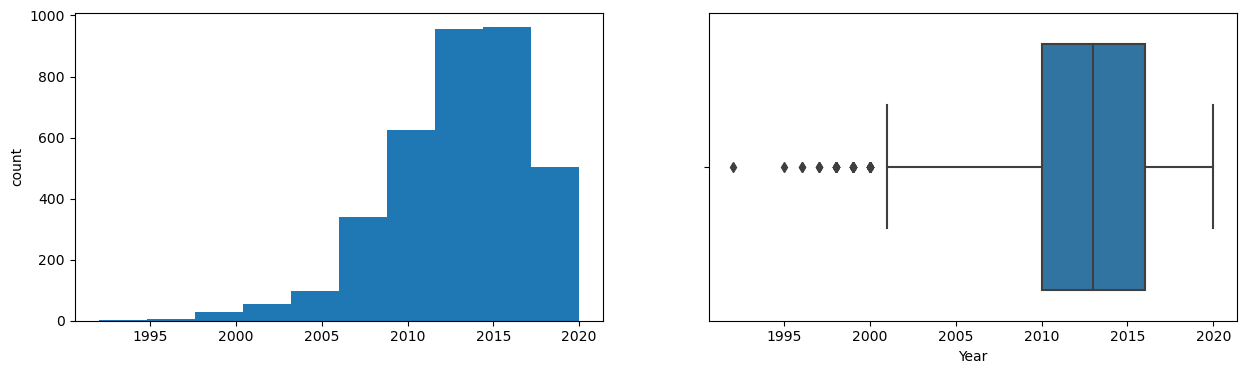

Selling_Price
Skew : 5.45


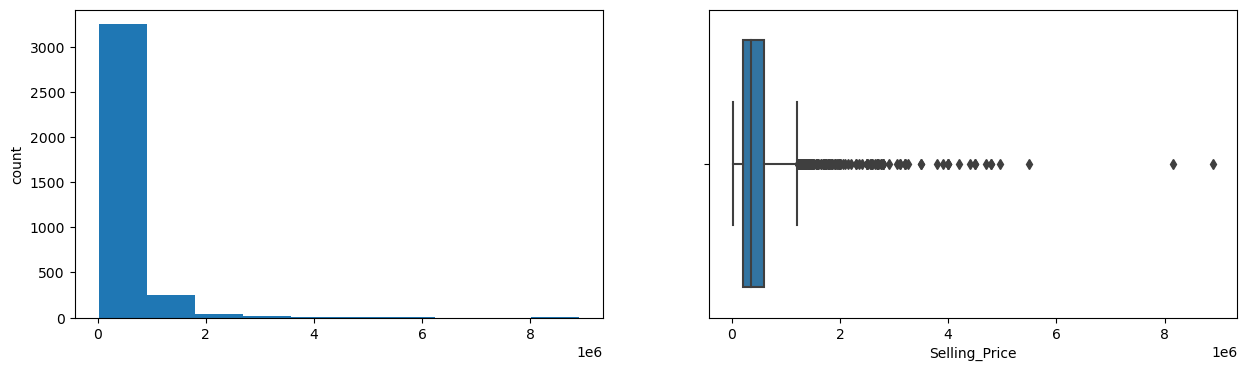

Km_Driven
Skew : 2.55


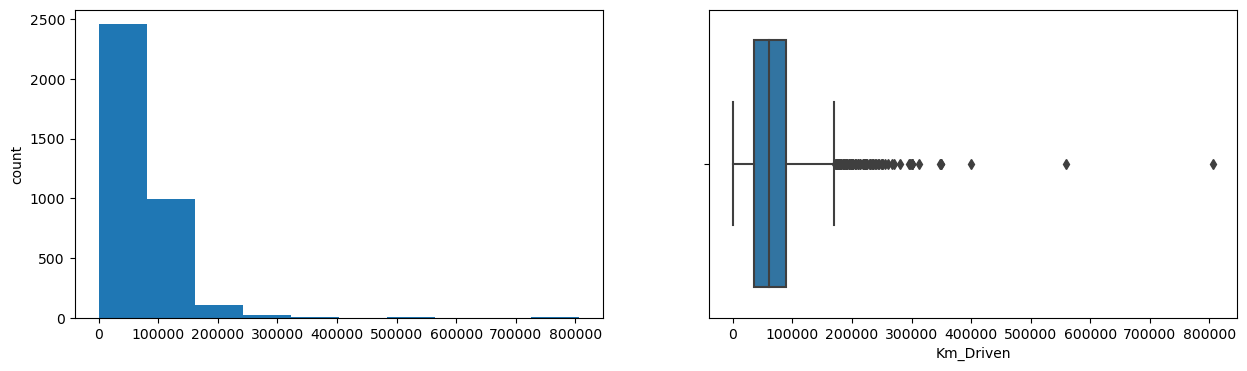

In [23]:
for col in num_cols:
    print(col)
    print('Skew :', round(car_detail[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    car_detail[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=car_detail[col])
    plt.show()

In [24]:
def Visualize(data,column):

  print('COUNTPLOT VISULIZATION')
 
  plt.figure(figsize = (10,7))
  sns.countplot(data = data,  x = column, palette= 'CMRmap' )
  plt.xticks(rotation = 45)
  plt.xlabel(column, fontsize = 12, color = 'b')
  plt.ylabel('count',fontsize = 12, color = 'b')
  plt.title(f'Distrubution {column} is Year by', color = 'blue', fontsize = 12)
  plt.legend()
  plt.show()
  print('\n')

  print('PIE CHART VISULIZATION')
  print('\n')
  labels = data[column].value_counts().index
  size = data[column].value_counts()
  
  plt.figure(figsize = (8,8))
  plt.pie(size, labels = labels , autopct = '%1.1f%%',shadow = True, startangle = 45, rotatelabels=False)
  plt.title(f'Distrubution {column} is year by', fontsize = 10, color = 'g')
  plt.show()


  print('\n')
  print('HISTPLOT VISULIZATION')
  plt.figure(figsize = (8,4))
  sns.histplot(data = data[column], bins = 20, kde = True)
  plt.title(f'Distrubution of {column}')
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


COUNTPLOT VISULIZATION


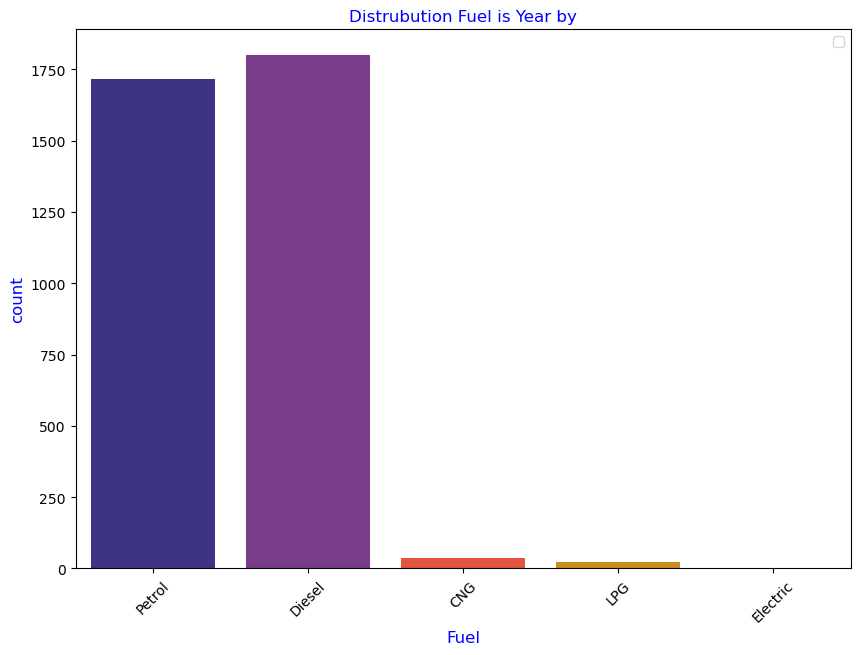



PIE CHART VISULIZATION




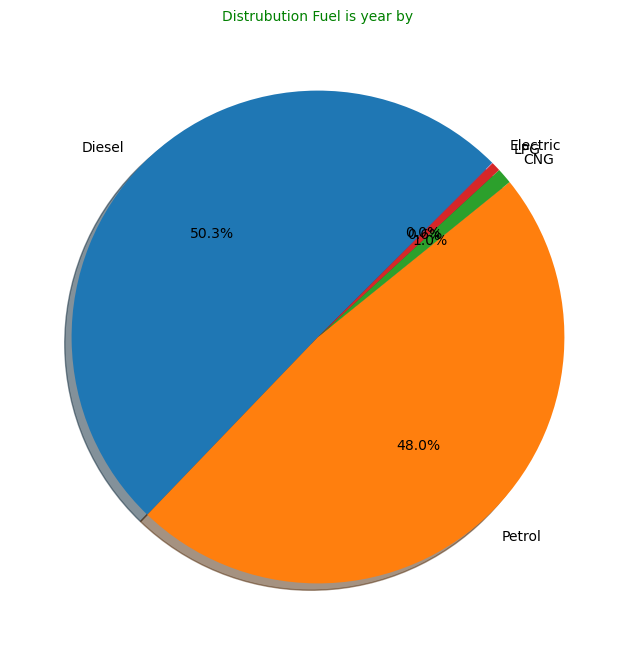



HISTPLOT VISULIZATION


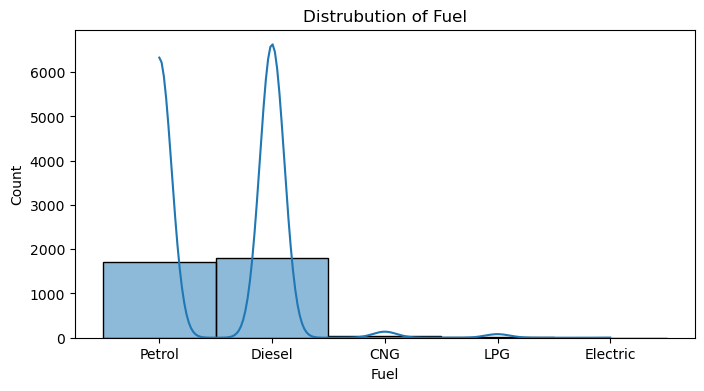

In [25]:
Visualize(car_detail,'Fuel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


COUNTPLOT VISULIZATION


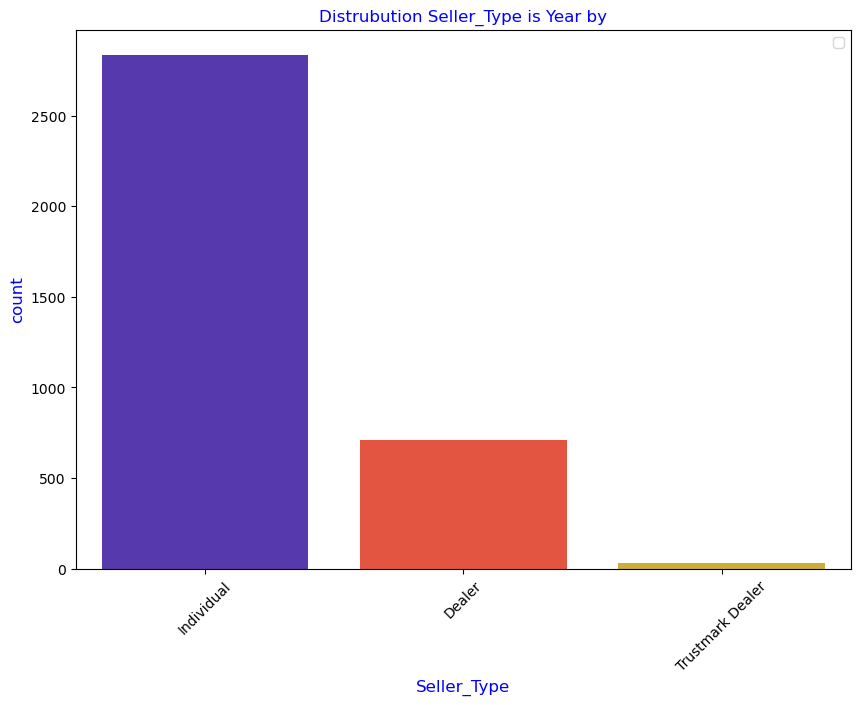



PIE CHART VISULIZATION




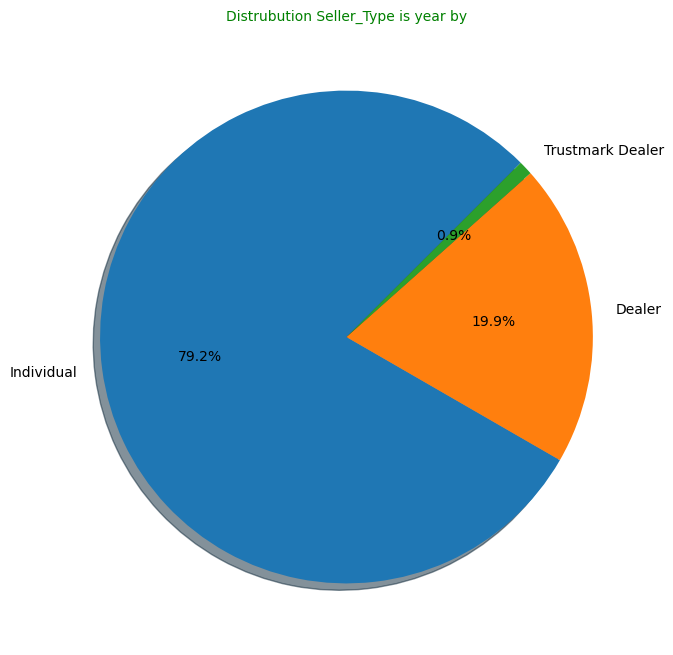



HISTPLOT VISULIZATION


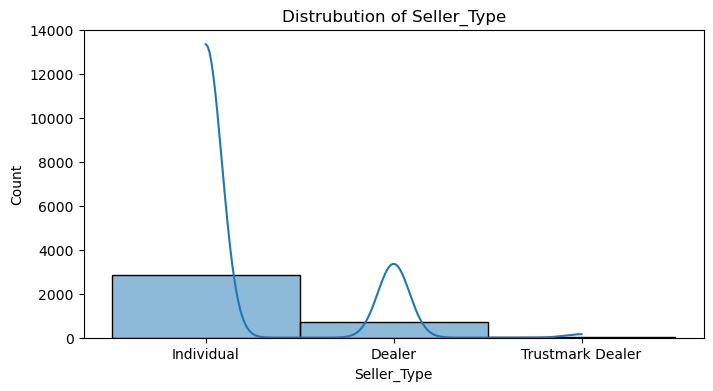

In [26]:
Visualize(car_detail,'Seller_Type')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


COUNTPLOT VISULIZATION


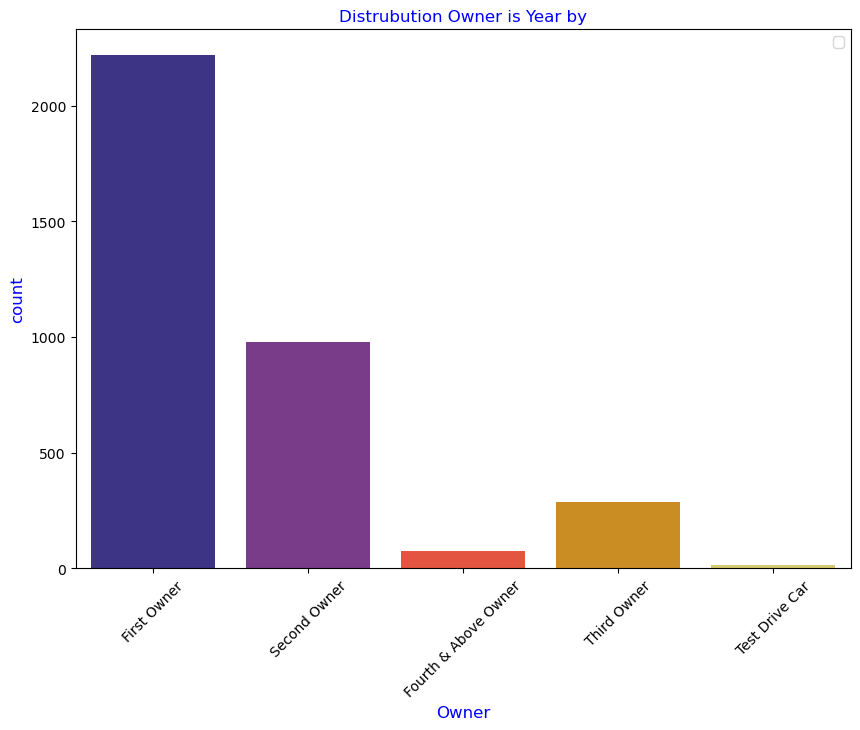



PIE CHART VISULIZATION




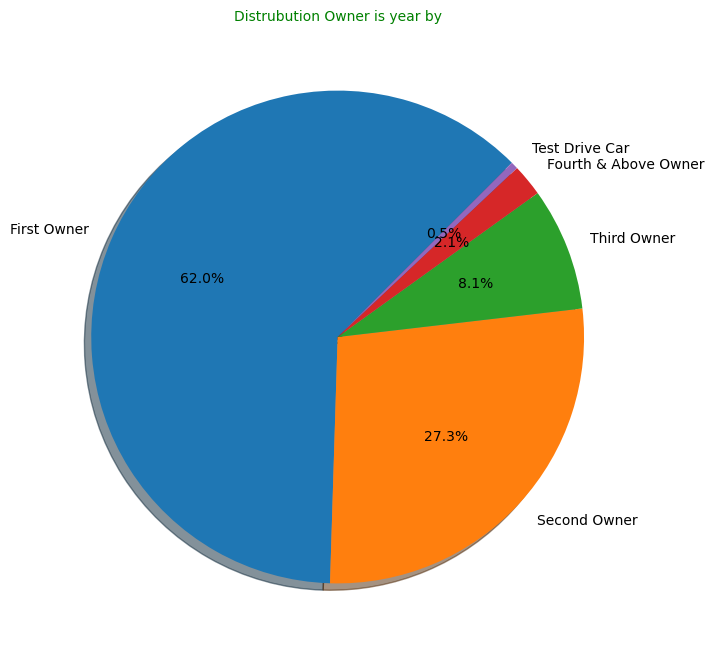



HISTPLOT VISULIZATION


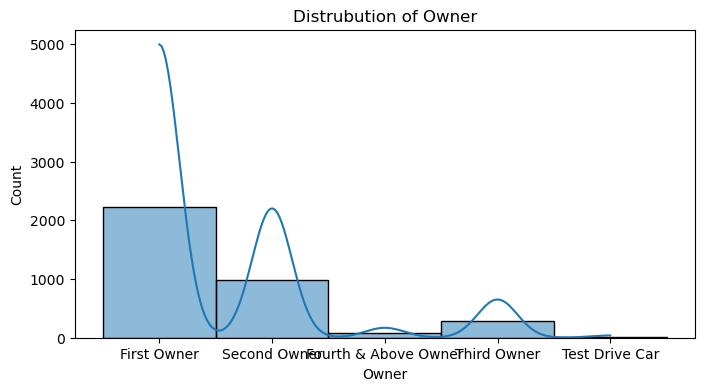

In [27]:
Visualize(car_detail,'Owner')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


COUNTPLOT VISULIZATION


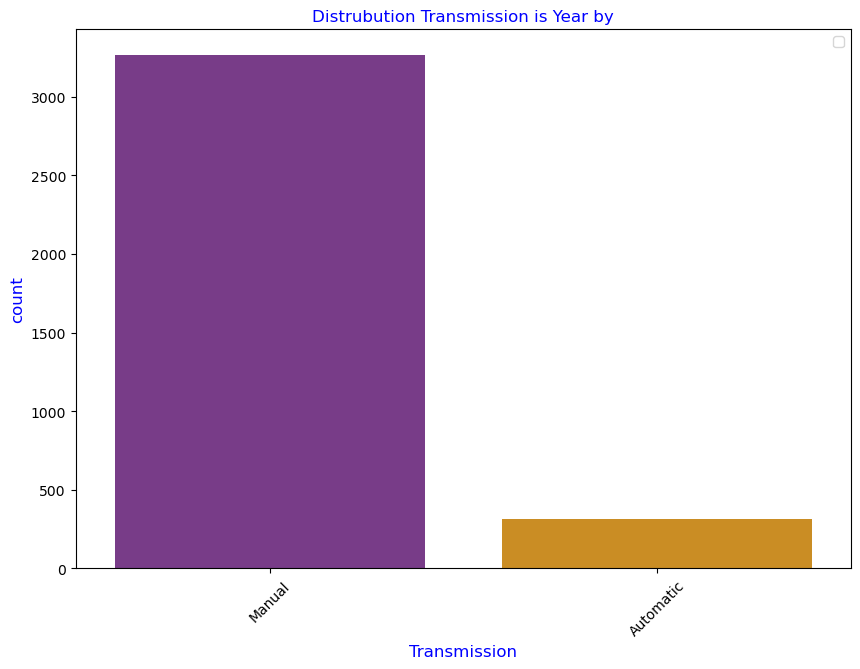



PIE CHART VISULIZATION




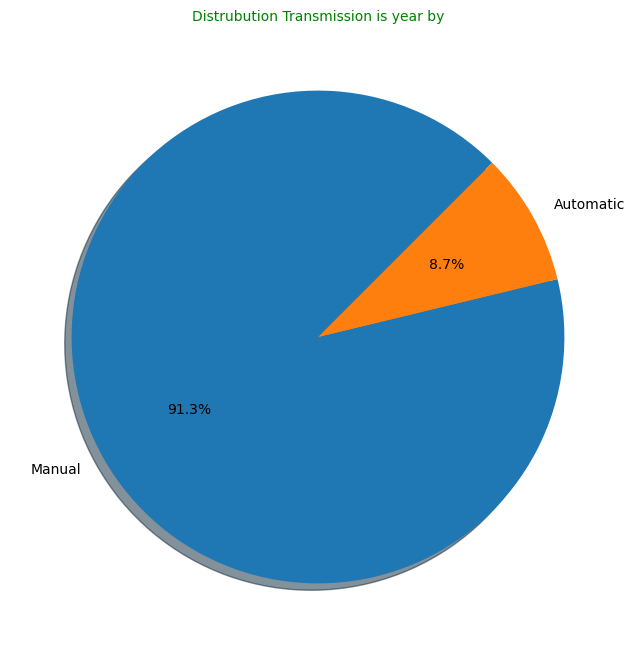



HISTPLOT VISULIZATION


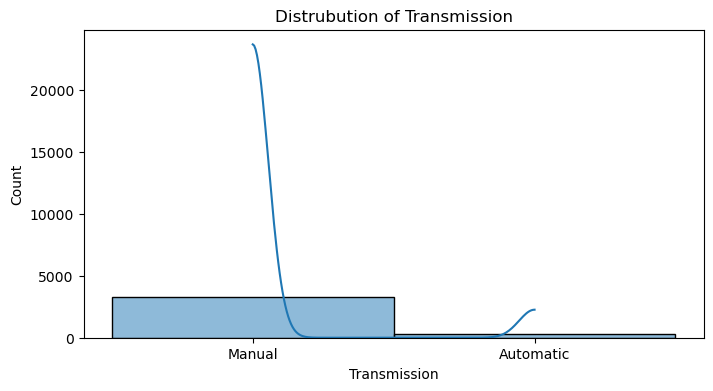

In [28]:
Visualize(car_detail,'Transmission')

In [29]:
# making copy of orignal dataset

new_df = car_detail.copy()

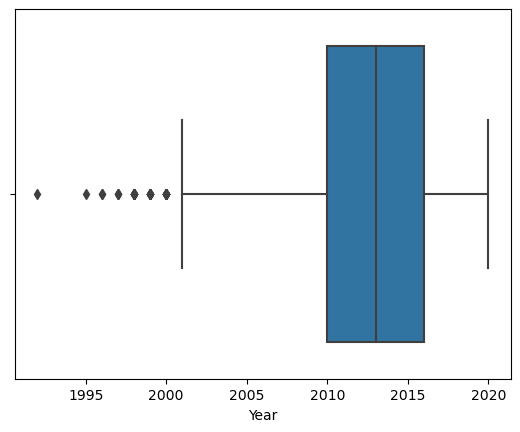

In [30]:
sns.boxplot(data=new_df,x='Year')
plt.show()

In [32]:
q1=new_df['Year'].quantile(0.25)
print(q1)
q3=new_df['Year'].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)

2010.0
2016.0
6.0


In [33]:
upper_limit=q1+1.5*iqr
lower_limit=q3-1.5*iqr
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 2019.0
Lower_limit 2007.0


In [34]:
new_df=new_df[new_df['Year']>lower_limit]

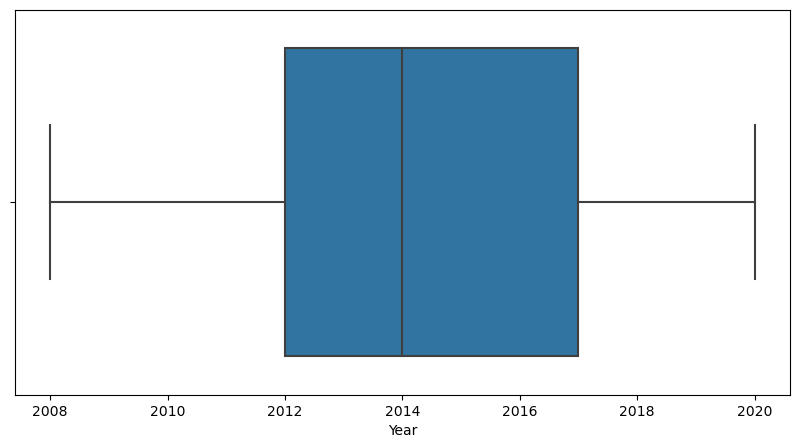

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x=new_df['Year'])
plt.show()

In [36]:
q1=new_df['Km_Driven'].quantile(0.25)
print(q1)
q3=new_df['Km_Driven'].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)

35000.0
90000.0
55000.0


In [37]:
upper_limit=q1+1.5*iqr
lower_limit=q3-1.5*iqr
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 117500.0
Lower_limit 7500.0


In [38]:
new_df=new_df[new_df['Km_Driven']<upper_limit]

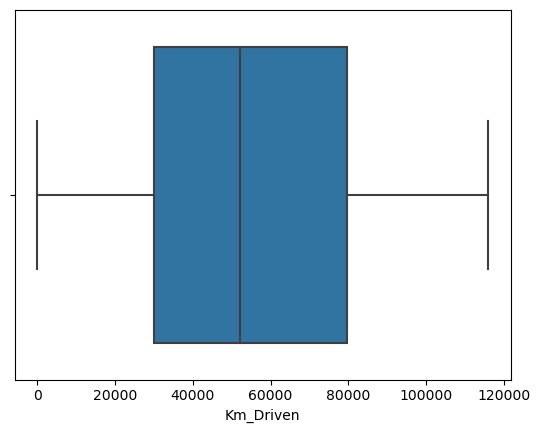

In [39]:
sns.boxplot(data=new_df,x='Km_Driven')
plt.show()

In [41]:
q1=new_df['Selling_Price'].quantile(0.25)
print(q1)
q3=new_df['Selling_Price'].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)

250000.0
640000.0
390000.0


In [42]:
upper_limit=q1+1.5*iqr
lower_limit=q3-1.5*iqr
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 835000.0
Lower_limit 55000.0


In [116]:
new_df=new_df[new_df['Selling_Price']<upper_limit]

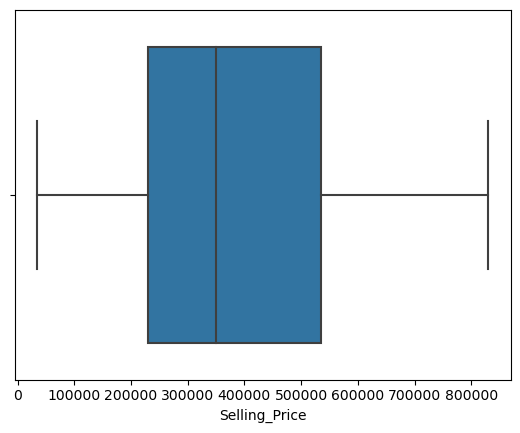

In [117]:
sns.boxplot(data=new_df,x='Selling_Price')
plt.show()


## Data Preprocessing
##### Handling categorical columns

In [43]:
new_df.head()

,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
6,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai,Xcent 1.2 Kappa S
7,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata,Indigo Grand Petrol
8,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai,Creta 1.6 VTVT S


In [44]:
new_df.to_csv('cleaned_car_data_1',  index = False)

In [45]:
# first  make a copy of the dataset
df = new_df.copy()


In [46]:
import pickle


brand_names = car_detail['Brand'].unique()
model_names = car_detail['Model'].unique()

pickle.dump(brand_names,open('brand_name_1.pkl','wb'))
pickle.dump(model_names,open('model_name_1.pkl','wb'))


In [48]:
# encoding categorical columns
from sklearn.preprocessing import LabelEncoder ,StandardScaler
lb = LabelEncoder()

for column in cat_cols:
  df[column] =  lb.fit_transform(df[column])



In [49]:
df.dtypes

Year             int64
Selling_Price    int64
Km_Driven        int64
Fuel             int32
Seller_Type      int32
Transmission     int32
Owner            int32
Brand            int32
Model            int32
dtype: object

In [50]:
df.to_csv('cars_modify_1.csv', index = False)

In [51]:
df1 = pd.read_csv('cars_modify_1.csv')
df1.head()

,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
0,2012,600000,100000,1,1,1,0,9,1032
1,2017,250000,46000,3,1,1,0,4,781
2,2016,550000,25000,3,1,1,0,9,1140
3,2014,240000,60000,3,1,1,2,22,568
4,2015,850000,25000,3,1,1,0,9,278


Train the model


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

def compare_models(x_train, y_train, x_test, y_test, models):
    results = []

    for model_name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        results.append((model_name, mae, mse, rmse, r2))

    result_df = pd.DataFrame(
            results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R-squared']
    )
    result_df = result_df.sort_values(by="R-squared", ascending=False)
    return result_df

def evaluate_model(df_1):
    x = df.drop("Selling_Price", axis=1)
    y = df["Selling_Price"]

    x_test, x_train, y_test, y_train = train_test_split(
        x, y, test_size=0.3, random_state=42
    )

    sc = StandardScaler()
    sc.fit_transform(x_train)
    sc.transform(x_test)

    models = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest Regressor", RandomForestRegressor()),
        ("Support Vector Regressor", SVR()),
        ("Bagging Regressor", BaggingRegressor())
        ]
        
    results_df = compare_models(x_train, y_train, x_test, y_test, models)

    print("Comparison of Regression Models:")
    print(results_df)

    best_model_1 = models[0][1]  # Best model is the first model in the sorted list

    return best_model_1


In [53]:
df= pd.read_csv('cars_modify_1.csv')

In [56]:
best_model_1 = evaluate_model(df)
best_model_1

Comparison of Regression Models:
                      Model            MAE           MSE           RMSE  \
1   Random Forest Regressor  160283.831356  1.544425e+11  392991.702797   
3         Bagging Regressor  167450.866311  1.568500e+11  396042.866671   
0         Linear Regression  234239.394111  1.784466e+11  422429.406085   
2  Support Vector Regressor  286606.617388  3.096851e+11  556493.549880   

   R-squared  
1   0.477295  
3   0.469147  
0   0.396054  
2  -0.048118  


LinearRegression()

In [57]:
import pickle
# Save the model
# Save the model
with open('best_model_1.pkl', 'wb') as f:
    pickle.dump(best_model_1, f)


In [60]:
# Load necessary libraries
import pandas as pd
import pickle
import random

# Load the car details dataset
cars_modify = pd.read_csv('cars_modify_1.csv')

# Pick 20 random data points
random_data = random.sample(list(cars_modify.index), 20)

# Load the saved model
loaded_model = pickle.load(open('best_model_1.pkl', 'rb'))

# Remove the target variable 'selling_price' if present
new_data = cars_modify.drop('Selling_Price', axis=1, errors='ignore')

# Extract actual selling prices
actual_selling_prices = cars_modify.loc[random_data, 'Selling_Price']

# Apply the model to the random data
predictions = loaded_model.predict(new_data.loc[random_data])

# Calculate the percentage difference
percentage_difference = ((predictions - actual_selling_prices) / actual_selling_prices) * 100

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Actual Selling Price': actual_selling_prices,
    'Predicted Selling Price': predictions,
    'Percentage Difference': percentage_difference
})

# Print the results
print(results_df)


      Actual Selling Price  Predicted Selling Price  Percentage Difference
638                 100000             5.208809e+05             420.880950
399                 850000             1.363190e+06              60.375236
187                 680000             8.853401e+05              30.197073
2548                400000             4.098500e+05               2.462500
2677                150000            -1.954867e+04            -113.032445
852                1085000             8.061328e+05             -25.702045
123                  72000             2.414928e+05             235.406609
2308               1000000             8.906144e+05             -10.938564
775                 500000             4.279948e+05             -14.401031
1938                480000             4.432236e+05              -7.661756
1873                363000             2.479437e+05             -31.695954
2136                190000             1.351813e+05             -28.851927
1971                11000